# Homework 1. MNIST 데이터셋을 활용해 다중 분류 수행하기
### 과목코드: [2150085101] (2150034001/2150085101)
### 팀명: [4조]
### 팀장: [장진영] (학번과 이름)
### 팀원: [강현준] (학번과 이름)
### 팀원: [이시호] (학번과 이름)

1. 모델후보군으로 다중퍼셉트론모델인 MLP에 대해 알아보았습니다.
또한 해당하는 모델과 기존 수업시간에 배운 결정트리,SGD,랜덤포레스트모델과 비교하여 어떠한 모델이 좋은지 평가하였습니다.

 2.train,validation 분할비율을 조사하여 넣었습니다.

#### 문제. 아래의 `코드`를 완성하고, 그에 대한 `분석`을 작성하시오.

1. (코드) MNIST 데이터셋 받기
   - (분석) 데이터셋에 대해 분석하기

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [4]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

2. (코드) 데이터셋을 train / validation / test set 으로 분할하기
   - (분석) 데이터셋을 분할한 방식에 대해 설명하고, 해당 분할 방식을 수행한 이유에 대해 설명하기

train set 과 validation set 과 test set의 optimal한 비율은 정해져 있지 않지만

대부분의 경우 train set 60 ~ 80% validation set 10 ~ 20% test set 10 ~ 20%의 비율로 분할을 합니다.

MNIST 데이터 셋의 경우 7만개의 sample중 1만개는 test sample 이므로

60000개를 train set으로

10000개를 test set으로 하였으며

train set 60000개중에 10000개를 validation set으로 분할하였습니다.

참고자료

https://www.v7labs.com/blog/train-validation-test-set

https://encord.com/blog/train-val-test-split/

In [5]:
X, y = mnist['data'], mnist['target']
y = y.astype(np.uint8)
X_train, X_valid, X_test ,y_train ,y_valid ,y_test = X[:50000], X[50000:60000],X[60000:],y[:50000], y[50000:60000],y[60000:]
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

3. (코드) 특성 스케일링을 이용한 데이터셋 전처리하기
   - (분석) 스케일링을 수행한 방식에 대해 설명하고, 해당 스케일링을 수행한 이유에 대해 설명하기

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val_split)
X_test_scaled = scaler.transform(X_test)

4. (코드) 모델 선택하기
   - (분석) 머신러닝 모델의 후보군들에 대해 설명하고, 후보군들 중 특정 모델이 대표 모델로 선택된 이유에 대해 설명하기

머신러닝 모델중 다층퍼셉트론 모델은 비선형적인 데이터에 대해 학습을 할 수 있기 때문에 이미지,음성,텍스트 등 여러 분야에 활용되는데 해당 모델과 수:업시간에 배운 확률적 경사 하강 모델(SGD) 랜덤포레스트 모델(Randomforeset),결정트리 모델(decisionTree)과 비교하였습니다.

참고자료

 https://mozenworld.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%AA%A8%EB%8D%B8-%EC%86%8C%EA%B0%9C-6-%EB%8B%A4%EC%B8%B5-%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0-Multilayer-Perceptron


사용법

 https://scikit-learn.org/dev/modules/generated/sklearn.neural_network.MLPClassifier.html


In [7]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_scaled, y_train_split)

SGDClassifier(random_state=42)

In [8]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train_scaled, y_train_split)

RandomForestClassifier(random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier
decision_clf = DecisionTreeClassifier(random_state=42)
decision_clf.fit(X_train_scaled, y_train_split)

DecisionTreeClassifier(random_state=42)

In [10]:
from sklearn.neural_network import MLPClassifier
multilayerperceptron_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
multilayerperceptron_clf.fit(X_train_scaled,y_train_split)

MLPClassifier(max_iter=500, random_state=42)

In [11]:
from sklearn.model_selection import cross_val_score
y_acc_sgd = cross_val_score(sgd_clf, X_train_scaled, y_train_split, cv=3, scoring="accuracy")
y_acc_forest = cross_val_score(forest_clf, X_train_scaled, y_train_split, cv=3, scoring="accuracy")
y_acc_decision = cross_val_score(decision_clf, X_train_scaled, y_train_split, cv=3, scoring="accuracy")
y_acc_multilayer = cross_val_score(multilayerperceptron_clf,X_train_scaled,y_train_split, cv=3, scoring="accuracy")

In [12]:
print(f"[SGD] Accuray: {y_acc_sgd}")
print(f"[RF] Accuray: {y_acc_forest}")
print(f"[DT] Accuray: {y_acc_decision}")
print(f"[MULT] Accuray: {y_acc_multilayer}")

[SGD] Accuray: [0.8998     0.90173333 0.9064    ]
[RF] Accuray: [0.95906667 0.96566667 0.96193333]
[DT] Accuray: [0.8442     0.85533333 0.85093333]
[MULT] Accuray: [0.96786667 0.97313333 0.96486667]


In [13]:
sgd_clf.score(X_test,y_test)
forest_clf.score(X_test,y_test)
decision_clf.score(X_test,y_test)
multilayerperceptron_clf.score(X_test,y_test)
print(f"[SGD]  score: {sgd_clf.score(X_test,y_test)}")
print(f"[RF]   score: {forest_clf.score(X_test,y_test)}")
print(f"[DT]   score: {decision_clf.score(X_test,y_test)}")
print(f"[MULT] score: {multilayerperceptron_clf.score(X_test,y_test)}")

[SGD]  score: 0.7708
[RF]   score: 0.9633
[DT]   score: 0.7313
[MULT] score: 0.9764


다층 퍼셉트론 모델이 다른 모델보다 정확도와 score가 가장 높은 것을 확인 할 수 있습니다.

따라서 해당 모델을 후보군으로 선택하였습니다.



5. (코드) 성능 평가하기
   - (분석) 최종적으로 학습된 모델을 이용해 test set 에 대한 성능을 정리하고, 이를 분석하기

In [115]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(multilayerperceptron_clf, X_train_scaled, y_train_split, cv=3)
mtx_cf = confusion_matrix(y_train_split, y_train_pred)

In [116]:
print('Confution Matrix: \n', mtx_cf)

print('Number of Samples: \t  ',    f'{mtx_cf.sum():5d}',    f'({mtx_cf.sum() / mtx_cf.sum() * 100:6.2f}%)')
print('Number of Negative Labels:', f'{mtx_cf[0].sum():5d}', f'({mtx_cf[0].sum() / mtx_cf.sum() * 100:6.2f}%)')
print('Number of Positive Labels:', f'{mtx_cf[1].sum():5d}', f'({mtx_cf[1].sum() / mtx_cf.sum() * 100:6.2f}%)')

Confution Matrix: 
 [[4340    3    8    6    4   25   17    4   13   15]
 [   1 5024   19   10    9    0    2   12   19    1]
 [  14   21 4304   30   24    5   11   34   26    5]
 [   3    3   37 4407    4   52    4   13   39   22]
 [   5    9   14    2 4278    3   14   13    7   50]
 [   7    8    6   45    7 3941   10    7   35   23]
 [  22    9    7    2   16   39 4328    3   16    1]
 [   2   12   32   15   15   10    1 4542   15   35]
 [  18   26   18   44   13   41   14    7 4128   40]
 [  11    5    2   21   40   24    2   38   16 4296]]
Number of Samples: 	   45000 (100.00%)
Number of Negative Labels:  4435 (  9.86%)
Number of Positive Labels:  5097 ( 11.33%)


In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
TN = mtx_cf[0, 0]
FP = mtx_cf[0, 1]
FN = mtx_cf[1, 0]
TP = mtx_cf[1, 1]

func_acc = lambda mtx_cf: (mtx_cf[0, 0] + mtx_cf[1, 1]) / (mtx_cf[0, 0] + mtx_cf[0, 1] + mtx_cf[1, 0] + mtx_cf[1, 1])
func_pre = lambda mtx_cf: (mtx_cf[1, 1]) / (mtx_cf[0, 1] + mtx_cf[1, 1])
func_rec = lambda mtx_cf: (mtx_cf[1, 1]) / (mtx_cf[1, 0] + mtx_cf[1, 1])
func_spe = lambda mtx_cf: (mtx_cf[0, 0]) / (mtx_cf[0, 0] + mtx_cf[0, 1])
func_f1 = lambda precision, recall: 2 * (precision * recall) / (precision + recall)

acc = accuracy_score(y_train_split,y_train_pred)
prec = precision_score(y_train_split,y_train_pred,average='weighted')
recall = recall_score(y_train_split,y_train_pred,average='weighted')
f1 = f1_score(y_train_split,y_train_pred,average='weighted')

acc_ = func_acc(mtx_cf)
prec_ = func_pre(mtx_cf)
recall_ = func_rec(mtx_cf)
f1_ = func_f1(prec_, recall_)

spe_ = func_spe(mtx_cf)


print(f"Metrics:      Function ~ Confusion")
print(f"Accuracy:\t{acc:.5f} ~ {acc_:.5f}")
print(f"Precision:\t{prec:.5f} ~ {prec_:.5f}")
print(f"Recall:\t\t{recall:.5f} ~ {recall_:.5f}")
print(f"F1:\t\t{f1:.5f} - {f1_:.5f}")

Metrics:      Function ~ Confusion
Accuracy:	0.96862 ~ 0.99957
Precision:	0.96865 ~ 0.99940
Recall:		0.96862 ~ 0.99980
F1:		0.96863 - 0.99960


6. (코드) 에러 분석하기
   - (분석) 최종적으로 학습된 모델의 에러를 분석하기
   - (분석) `5. 성능 평가하기` 의 분석과 연관지어 에러를 분석하고 해결책을 제안하기

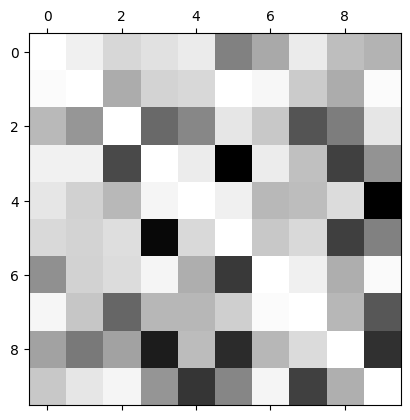

In [32]:
row_sums = mtx_cf.sum(axis=1, keepdims=True)
norm_conf_mx = mtx_cf / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap='binary')
plt.show()

오차행렬을 표준화하여 나타낸 행렬중 가장 검은 부분들을 보면 4개의 cell이 존재합니다.

3으로 예측햇는데 5이거나

5로 예측했는데 3이거나

3으로 예측했는데 8이거나

9로 예측했는데 4인 경우입니다.

해당하는 데이터들을 시각화하겠습니다.

In [103]:
# EXTRA plot functions for multiple digit instances
def plot_digits(instances, images_per_row=10, **options):
  size = 28
  images_per_row = min(len(instances), images_per_row)
  images = [instance.reshape(size,size) for instance in instances]
  n_rows = (len(instances) - 1) // images_per_row + 1
  row_images = []
  n_empty = n_rows * images_per_row - len(instances)
  images.append(np.zeros((size, size * n_empty)))
  for row in range(n_rows):
    rimages = images[row * images_per_row : (row + 1) * images_per_row]
    row_images.append(np.concatenate(rimages, axis=1))
  image = np.concatenate(row_images, axis=0)
  plt.imshow(image, cmap = mpl.cm.gray, **options)
  plt.axis("off")

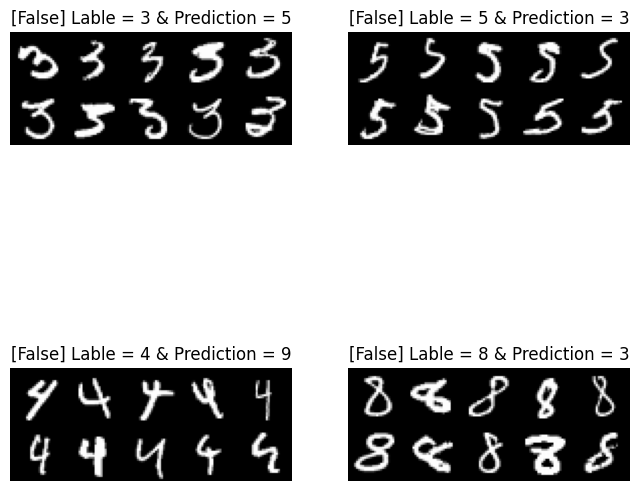

In [109]:
import matplotlib as mpl
import matplotlib.pyplot as plt  # 그래프를 그리기 위한 pyplot 모듈을 plt로 불러옴
cls_3,cls_4,cls_5,cls_8,cls_9 = 3,4,5,8,9
X_35 = X_train_split[(y_train_split == cls_3) & (y_train_pred == cls_5)]
X_53 = X_train_split[(y_train_split == cls_5) & (y_train_pred == cls_3)]
X_49 = X_train_split[(y_train_split == cls_4) & (y_train_pred == cls_9)]
X_83 = X_train_split[(y_train_split == cls_8) & (y_train_pred == cls_3)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_35[:10], images_per_row=5); plt.title('[False] Lable = 3 & Prediction = 5');
plt.subplot(222); plot_digits(X_53[:10], images_per_row=5); plt.title('[False] Lable = 5 & Prediction = 3');
plt.subplot(223); plot_digits(X_49[:10], images_per_row=5); plt.title('[False] Lable = 4 & Prediction = 9');
plt.subplot(224); plot_digits(X_83[:10], images_per_row=5); plt.title('[False] Lable = 8 & Prediction = 3');

잘못 예측한 그림들을 보면 휘갈겨 쓴 경우나 굵기가 두꺼워 알아보기 힘든것들도 있습니다.

이 경우에는 해당하는 데이터를 제거를 하거나 데이터 전처리를 하여 굵은 것들을 가늘게하여 정확도을 높일 수 있습니다.


